# Análisis y Curación de datos - Feature Engineering

## Importación de librerías

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos 

In [10]:
data = pd.read_csv("loan.csv")

In [12]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## Recategorización de variables

Una de las transformaciones que se suelen efectuar en variables categóricas, es recategorizarlas en una nueva variable, ya que a veces la gran apertura de las mismas, no refleja la correlación con la variable objetivo, y además podría complejizar el entrenamiento del modelo.

In [9]:
data['occupation'].unique()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [15]:
data['occupation'].value_counts()

occupation
Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: count, dtype: int64

In [17]:
dic_occupation = {'engineer': ['Engineer'],
                  'pilot':['Pilot'],
                  'lawyer':['Lawyer'],
                  'language': ['Editor','Writer','Researcher'],
                  'gastronomy' : ['Chef','Server'],
                  'marketing and sales': ['Salesman', 'Marketing', 'Sales'],
                  'art': ['Musician','Artist','Stylist','Photographer'],
                  'architecture': ['Architect', 'Designer','Electrician'],
                  'it': ['IT','Programmer','Software','Analyst','HR'],
                  'health': ['Dentist','Pharmacist','Psychologist','Doctor','Nurse','Veterinarian'],
                  'education': ['Teacher','Professor','Student'],
                  'administration and finance' : ['Manager', 'Accountant','Consultant', 'Realtor','Receptionist','Banker']
}

In [19]:
data['new_occupation']= data['occupation']
for i in dic_occupation:
    data['new_occupation'] = data['new_occupation'].replace(dic_occupation[i], i)
data[['occupation','new_occupation']].sample(5)

,occupation,new_occupation
51,Designer,architecture
39,Stylist,art
0,Engineer,engineer
1,Teacher,education
19,Professor,education


In [23]:
data.new_occupation.nunique()

12

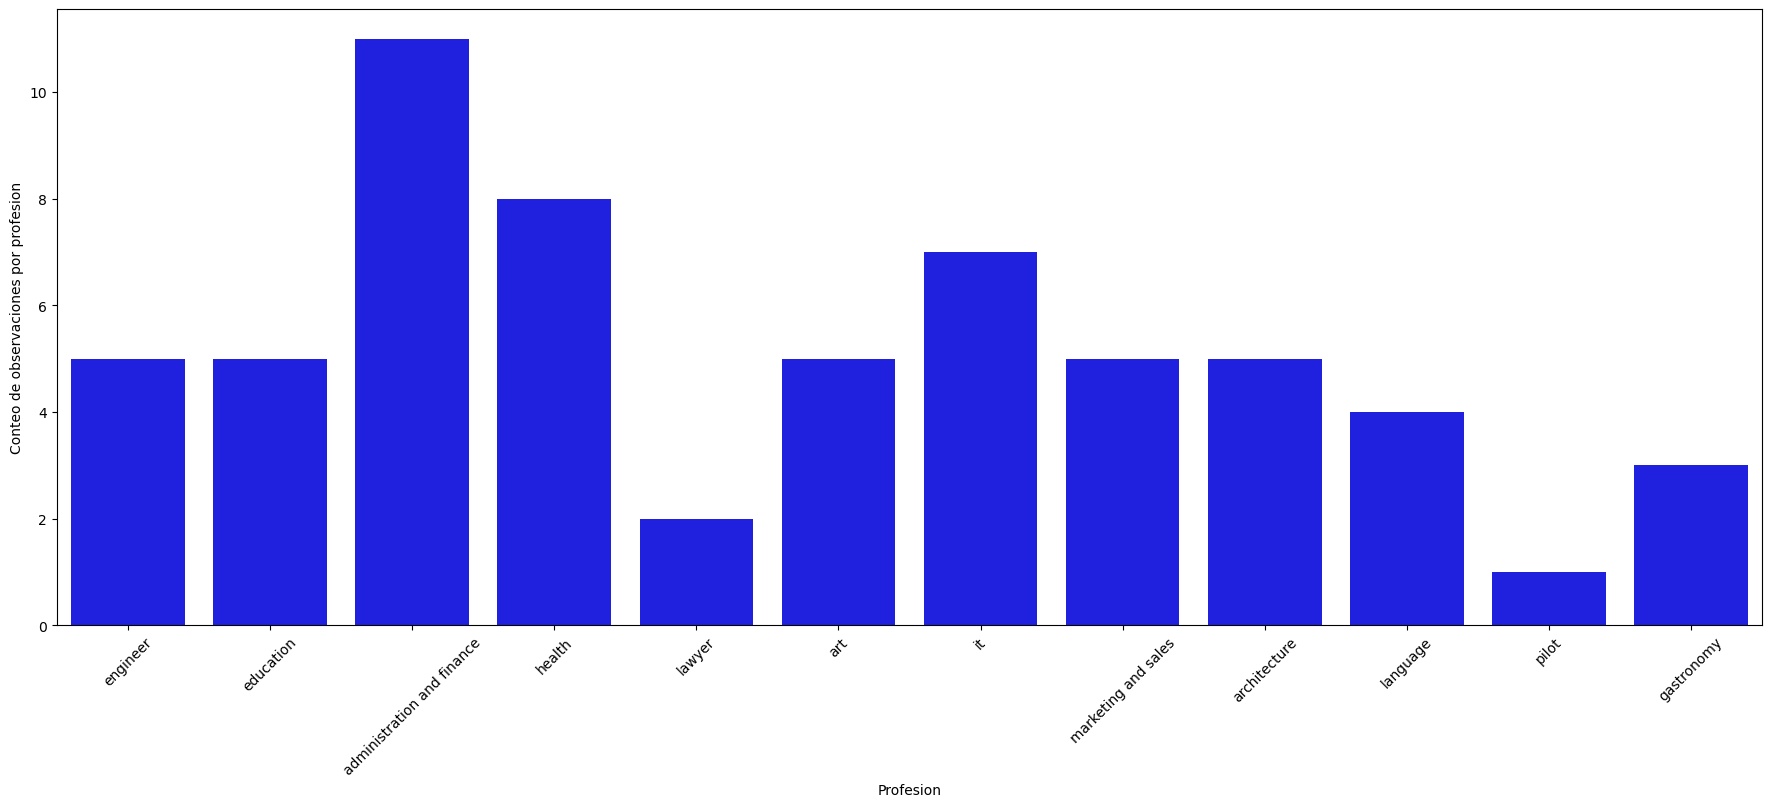

In [13]:
fig = plt.figure(figsize=(22,8))
sns.countplot(data=data, x='new_occupation',
                color='blue')
plt.xticks(rotation=45)
plt.ylabel("Conteo de observaciones por profesion")
plt.xlabel("Profesion")
plt.ticklabel_format(style='plain', axis='y')

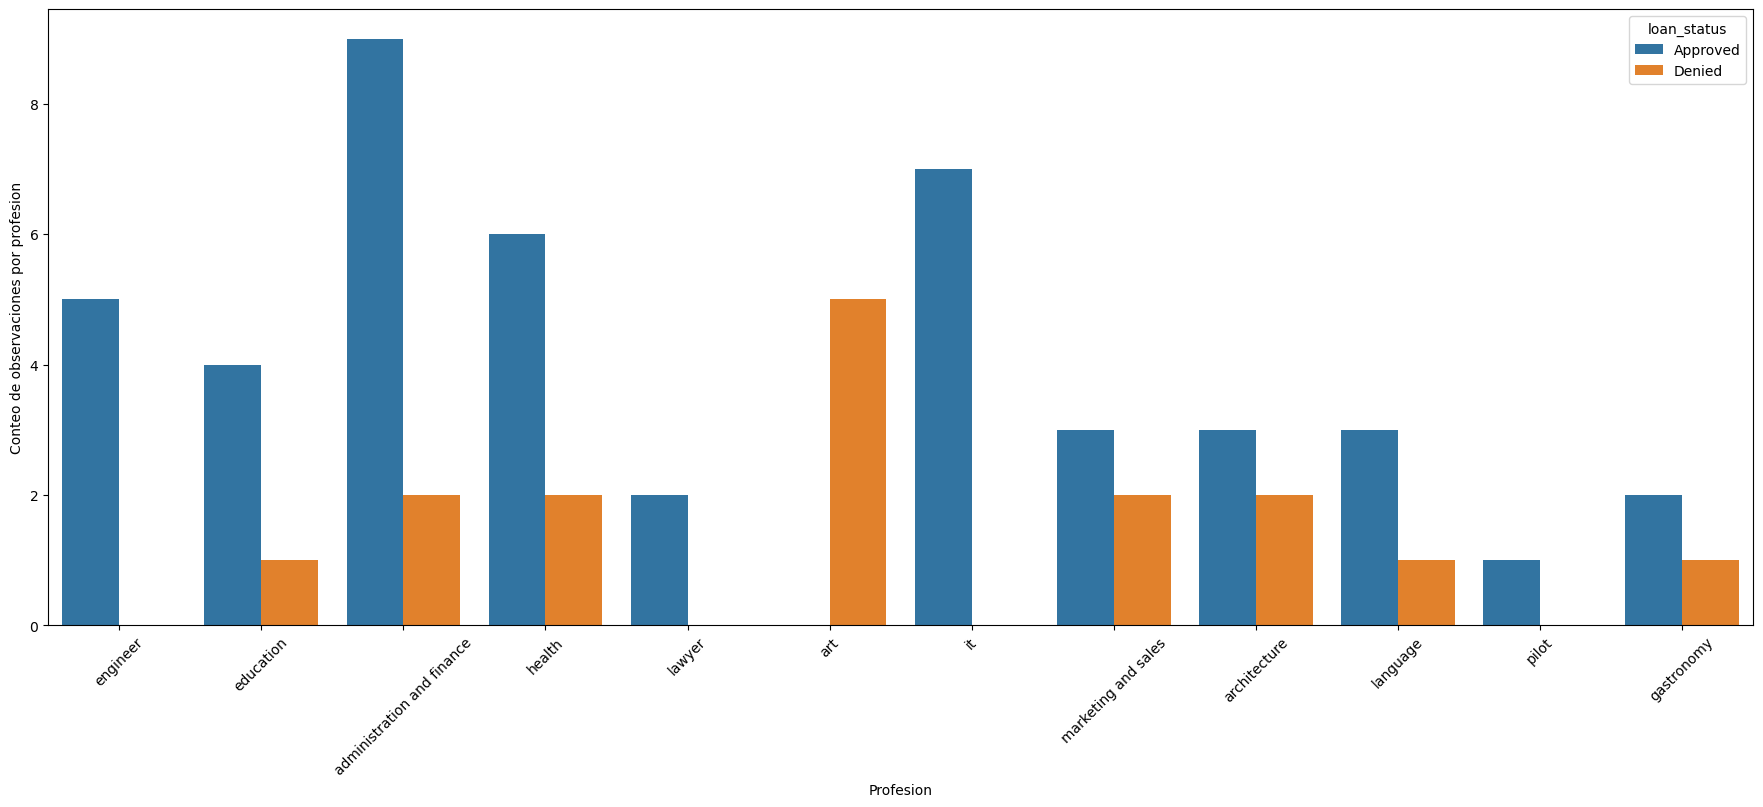

In [27]:
fig = plt.figure(figsize=(22,8))
sns.countplot(data=data, x='new_occupation',
                  hue= 'loan_status')
plt.xticks(rotation=45)
plt.ylabel("Conteo de observaciones por profesion")
plt.xlabel("Profesion")
plt.ticklabel_format(style='plain', axis='y')

## Creación de rangos

Otra transformación que podemos realizar con variables numéricas es convertirla en categórica, mediante la creación de rangos, de forma tal que ayude a explicar mejor la variable objetivo.

In [16]:
data['income'].describe()

count        61.000000
mean      78983.606557
std       33772.025802
min       25000.000000
25%       52000.000000
50%       78000.000000
75%       98000.000000
max      180000.000000
Name: income, dtype: float64

In [17]:
# Definir los límites de los rangos
limites_income = [20000, 40000, 60000, 80000, 100000, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_income = ['20000-40000', '40000-60000', '60000-80000', '80000-100000','100000+']

# Crear la columna 'rango_dias_solicitados' con los rangos correspondientes
data['new_income'] = pd.cut(data['income'], bins=limites_income, labels=etiquetas_income, right=False)

In [18]:
data[['income','new_income']].sample(5)

,income,new_income
22,115000,100000+
53,85000,80000-100000
39,42000,40000-60000
33,140000,100000+
36,100000,100000+


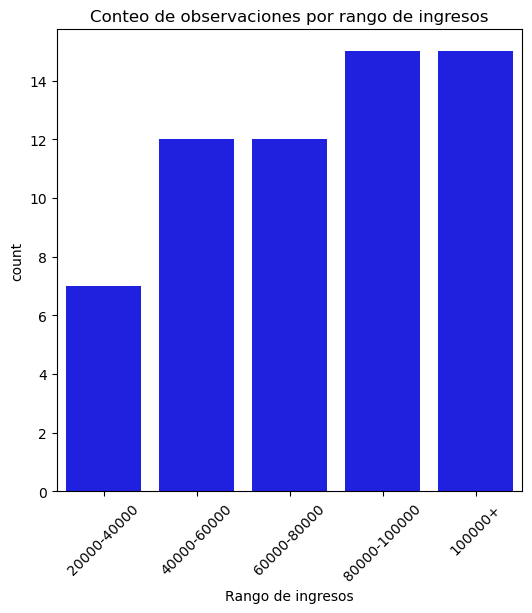

In [19]:
fig = plt.figure(figsize=(6,6))
sns.countplot(data=data, x='new_income',
                color='blue')
plt.xticks(rotation=45)
plt.title("Conteo de observaciones por rango de ingresos")
plt.xlabel("Rango de ingresos")
plt.ticklabel_format(style='plain', axis='y')

## Codificación de variables categóricas 

A la hora de entrenar un modelo de machine learning necesitamos que todas las variables sean numéricas, por eso debemos codificar las variables categóricas. 
Vamos a ver dos formas de codificar.

In [22]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,new_occupation,new_income
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,engineer,80000-100000
1,45,Female,Teacher,Master's,Single,62000,680,Approved,education,60000-80000
2,28,Male,Student,High School,Single,25000,590,Denied,education,20000-40000
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,administration and finance,100000+
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,administration and finance,60000-80000


In [23]:
data_encoded = data.drop(columns={'occupation','income'})

In [24]:
numerical_columns = data_encoded.select_dtypes(include='number').columns.to_list()
numerical_columns

['age', 'credit_score']

In [25]:
categorical_columns = data_encoded.select_dtypes(include=['object','category']).columns.to_list()
categorical_columns.remove('loan_status')

In [26]:
categorical_columns

['gender', 'education_level', 'marital_status', 'new_occupation', 'new_income']

### 1. Label Encoder

Conserva la estructura de columnas y filas del dataset original. Se codifica con números los diferentes valores que asumen las variables categóricas.

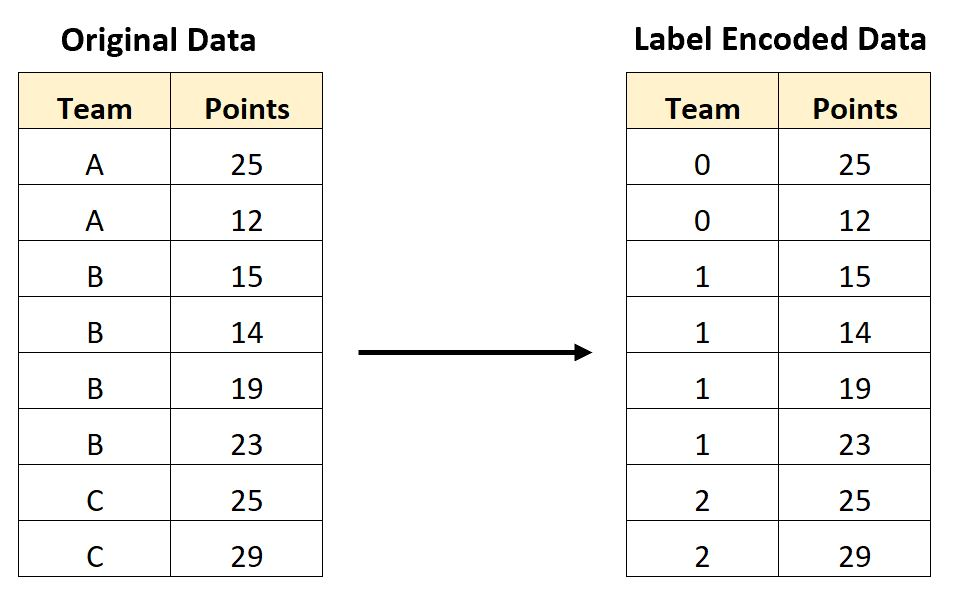

In [29]:
from sklearn.preprocessing import LabelEncoder

gender_level_ =LabelEncoder()
education_level_=LabelEncoder()
marital_status_=LabelEncoder()
new_occupation_=LabelEncoder()
new_income_ =LabelEncoder()

In [30]:
data_encoded['gender'] = gender_level_.fit_transform(data_encoded['gender'])
data_encoded['education_level'] = education_level_.fit_transform(data_encoded['education_level'])
data_encoded['marital_status'] = marital_status_.fit_transform(data_encoded['marital_status'])
data_encoded['new_occupation'] = new_occupation_.fit_transform(data_encoded['new_occupation'])
data_encoded['new_income'] = new_income_.fit_transform(data_encoded['new_income'])

data_encoded.head()

,age,gender,education_level,marital_status,credit_score,loan_status,new_occupation,new_income
0,32,1,1,0,720,Approved,4,4
1,45,0,4,1,680,Approved,3,3
2,28,1,3,1,590,Denied,3,1
3,51,0,1,0,780,Approved,0,0
4,36,1,1,0,710,Approved,0,3


### 2. OneHotEncoder

Realiza una transposición de cada variable a codificar, creando tantas columnas como valores pueda asumir esa variable. Si la observación que estamos viendo, posee ese valor positivo en la categoria, tendra un 1 para esa columna, sino sera 0. 

Por lo tanto la matriz creada, tendra tantas columnas como valores diferentes asuman las variables categóricas, más las variables numéricas.

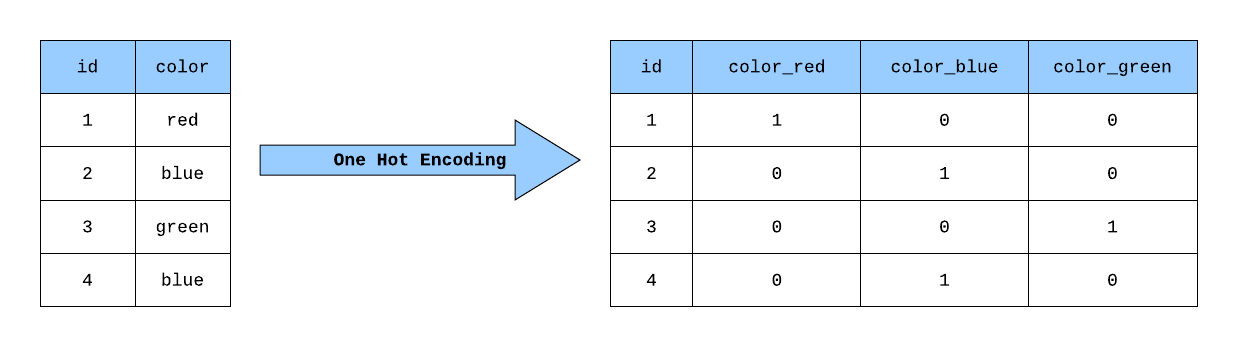

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
data_encoded2 = data.drop(columns={'occupation','income'})

In [35]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(data_encoded2[categorical_columns])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(["Associate's", "Bachelor's", 'Doctoral', 'High School', "Master's"],
       dtype=object),
 array(['Married', 'Single'], dtype=object),
 array(['administration and finance', 'architecture', 'art', 'education',
        'engineer', 'gastronomy', 'health', 'it', 'language', 'lawyer',
        'marketing and sales', 'pilot'], dtype=object),
 array(['100000+', '20000-40000', '40000-60000', '60000-80000',
        '80000-100000'], dtype=object)]

In [36]:
data_encoded2[categorical_columns]

,gender,education_level,marital_status,new_occupation,new_income
0,Male,Bachelor's,Married,engineer,80000-100000
1,Female,Master's,Single,education,60000-80000
2,Male,High School,Single,education,20000-40000
3,Female,Bachelor's,Married,administration and finance,100000+
4,Male,Bachelor's,Married,administration and finance,60000-80000
...,...,...,...,...,...
56,Male,Master's,Married,architecture,100000+
57,Female,High School,Single,administration and finance,20000-40000
58,Male,Bachelor's,Married,administration and finance,80000-100000
59,Female,Master's,Single,language,40000-60000


In [37]:
data_encoded2['gender'].nunique() + data_encoded2['education_level'].nunique() + data_encoded2['marital_status'].nunique() + data_encoded2['new_occupation'].nunique() + data_encoded2['new_income'].nunique()

26

In [38]:
data_encoded2[numerical_columns].shape[1]

2

In [39]:
encoded_types = encoder.transform(data_encoded2[categorical_columns])
encoded_types[:].shape

(61, 26)

In [40]:
data_numeric = data_encoded2[numerical_columns].values
data_numeric[:10]

array([[ 32, 720],
       [ 45, 680],
       [ 28, 590],
       [ 51, 780],
       [ 36, 710],
       [ 24, 640],
       [ 42, 790],
       [ 29, 620],
       [ 37, 750],
       [ 48, 820]])

In [41]:
matriz = np.hstack((encoded_types, data_numeric))
matriz.shape

(61, 28)

In [42]:
data_encoded['loan_status'] = data_encoded['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

## Importación de librerías

In [44]:
data_encoded.to_csv('data_encoded.csv',index=False)